<div>
<table style="width: 100%">
	<tr>
		<td>
		<table style="width: 100%">
			<tr>
                <td ><center><font size="5"><b>Module 49</b></font><center>
                <center><font size="6">Digital Innovations for Water Challenges</font><center></td>
			</tr>
			<tr>
                <td><center><font size="14">Notebook 1c</font><center></td>
			</tr>
			<tr>
                <td><center><font size="6"><b>Use of APIs to download time series data</b></font><center></td>
			</tr>
		</table>
		</td>
		<td><center><img src='images\ihe-delft-institute_unesco_fc-lr.jpg'></img></td>
	</tr>
</table>
</div>

# Table of contents
1. [Learning objectives](#learningobs)
2. [Introduction to APIs](#introduction)
3. [An example](#Example)
4. [Exercise](#Exercise)

# 1. Learning objectives<a name="learningobs"></a>

- Understand what APIs are.
- Use API to access weather data. 

# 2. Introduction<a name="introduction"></a>

What does API stand for?

“API stands for Application Programming Interface. In the context of APIs, the word Application refers to any software with a distinct function. Interface can be thought of as a contract of service between two applications. This contract defines how the two communicate with each other using requests and responses. Their API documentation contains information on how developers are to structure those requests and responses.” From <a href="https://aws.amazon.com/what-is/api/">Amazon.com </a>

What is an API?

“APIs are mechanisms that enable two software components to communicate with each other using a set of definitions and protocols. For example, the weather bureau’s software system contains daily weather data. The weather app on your phone “talks” to this system via APIs and shows you daily weather updates on your phone.” From <a href="https://aws.amazon.com/what-is/api/">Amazon.com </a>

How do APIs work?
 
 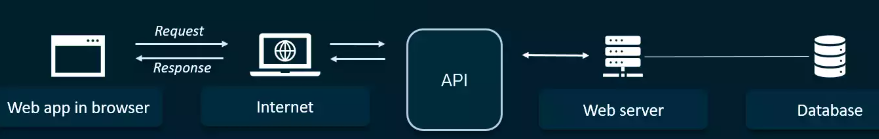
 
API architecture is usually explained in terms of client and server. The application sending the request is called the client, and the application sending the response is called the server. So in the weather example, the bureau’s weather database is the server, and the mobile app is the client. 

Think of an API to be the “middleman” between the application you are using and the server. You tell your app to do something for you, then the app will use an API to communicate with the web server, telling it what to do. This action is called a request. Afterward, the server will send a response to be delivered by the “middleman” to your app.



## 3 - An example <a name="Example"></a>
The <a href="https://openweathermap.org/api">OpenWeatherMap</a> is a service that provides weather data, including current weather data, forecasts, and historical data to the developers of web services and mobile applications.

To use this current weather data API, you need an API key, which can be obtained from <a href="https://openweathermap.org/api">here</a>.

After obtaining the API key, create a text file called api_keys.py and paste the api key in the file as shown below
OWM_key = 'your api key here'

Make sure you have the following packages installed.  These are normally installed with default python.
   - requests
   - json
   - pandas


In [ ]:
from api_keys import *
import pandas as pd
import requests
import json

country_name = ['NL', 'ET', 'SU', 'IN', 'CD']
city_name = ['Delft', 'Addis Ababa', 'Khartoum', 'Bombay', 'Kinshasa']

base_url = f"http://api.openweathermap.org/data/2.5/forecast/?"
 
idx = 1
complete_url = base_url+'q='+city_name[idx]+','+country_name[idx]+'&appid='+OWM_key+'&units=metric&lang=en'

response = requests.get(complete_url)

response.json()

In [ ]:
# exploring the response details
print('response code:', response.json()['cod']) # response code ('200' means the response is okay - data fetched from the server
print('message:', response.json()['message'])
print('# of timesteps', response.json()['cnt']) # count of the time steps 
print('city details:', response.json()['city']) # city details
city_details = response.json()['city']

In [ ]:
# Extract time, temprature and precipitation forecast for the city of your interest
forecast_api = response.json()['list']
weather_info = []

# datetime, temperature, wind, prob_perc, rain_qty, snow = [], [], [], [], [], []
for forecast_3h in forecast_api: 
    weather_hour = {}
    # datetime utc
    weather_hour['datetime'] = forecast_3h['dt_txt']
    # temperature 
    weather_hour['temperature'] = forecast_3h['main']['temp']
    # wind
    weather_hour['wind'] = forecast_3h['wind']['speed']
    # probability precipitation 
    try: weather_hour['prob_perc'] = float(forecast_3h['pop'])
    except: weather_hour['prob_perc'] = 0
    # rain
    try: weather_hour['rain_qty'] = float(forecast_3h['rain']['3h'])
    except: weather_hour['rain_qty'] = 0
    # wind 
    try: weather_hour['snow'] = float(forecast_3h['snow']['3h'])
    except: weather_hour['snow'] = 0
    # weather_hour['municipality_iso_country'] = city_name[idx] + ', ' + country_name[idx] #Check it
    weather_info.append(weather_hour)    
print(city_details['name'])
# chnage the dict to pandas dataframe
weather_data = pd.DataFrame(weather_info)
# print the first 5 rows of the data
weather_data.head()

In [ ]:
# Make the datetime colum an index and delet the datetime column
weather_data.index = weather_data.datetime
del weather_data['datetime']
weather_data

In [ ]:
weather_data.temperature.plot(figsize=(12,4), rot=90)

## 4 - Exercise <a name="Exercise"></a>

<div class="alert alert-success">

**EXERCISE**:

* Download the forecast for your city and plot the temperature forecast.
    - How long is the forecast?
    - What is the minimum and maximum temperature of the forecast? 

<details>
  <summary>Hints</summary>

* Add your country code and the city name in the country_name and city_name lists and use the appropriate index. sheet_name.

</details>
    
</div>